In [1]:
import os

In [2]:
# Downloads all the corresponding data from source and unzips them

# Checks if its not already downloaded, downloads it and extract it
if 'images.tar' not in os.listdir('./data'):
    !wget --directory-prefix ./data http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar data/
    !tar -xf ./data/images.tar -C ./data

# BLABLABLABL PLACEHOLDER TEXT

LOREM IPSUM BLABLABALBLABLAB DATA ANALYSIS

---

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import re

from sklearn.model_selection import train_test_split
from scipy import stats
from glob import glob
from PIL import Image


In [4]:
classes_dir = glob('./data/Images/*')
images_path_list = [img for img in glob('./data/Images/*/*')]

# Assert if all classes present
assert 120 == len(classes_dir),  "Something wrong with the dirs"
assert 20580 == len(images_path_list), "Something wrong with the images"

We can see its kinda well distributed

DescribeResult(nobs=120, minmax=(148, 252), mean=171.5, variance=539.2100840336135, skewness=1.1129454577500337, kurtosis=0.5650105173577553)


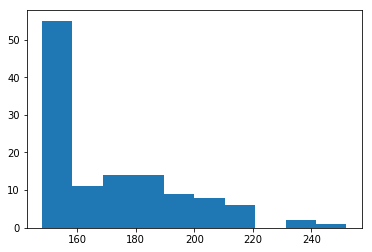

In [5]:
items_in_classes = [len(glob(dog_breed + '/*')) for dog_breed in classes_dir]
print(stats.describe(items_in_classes))
plt.hist(items_in_classes)
plt.show()

## Visualizing Dataset

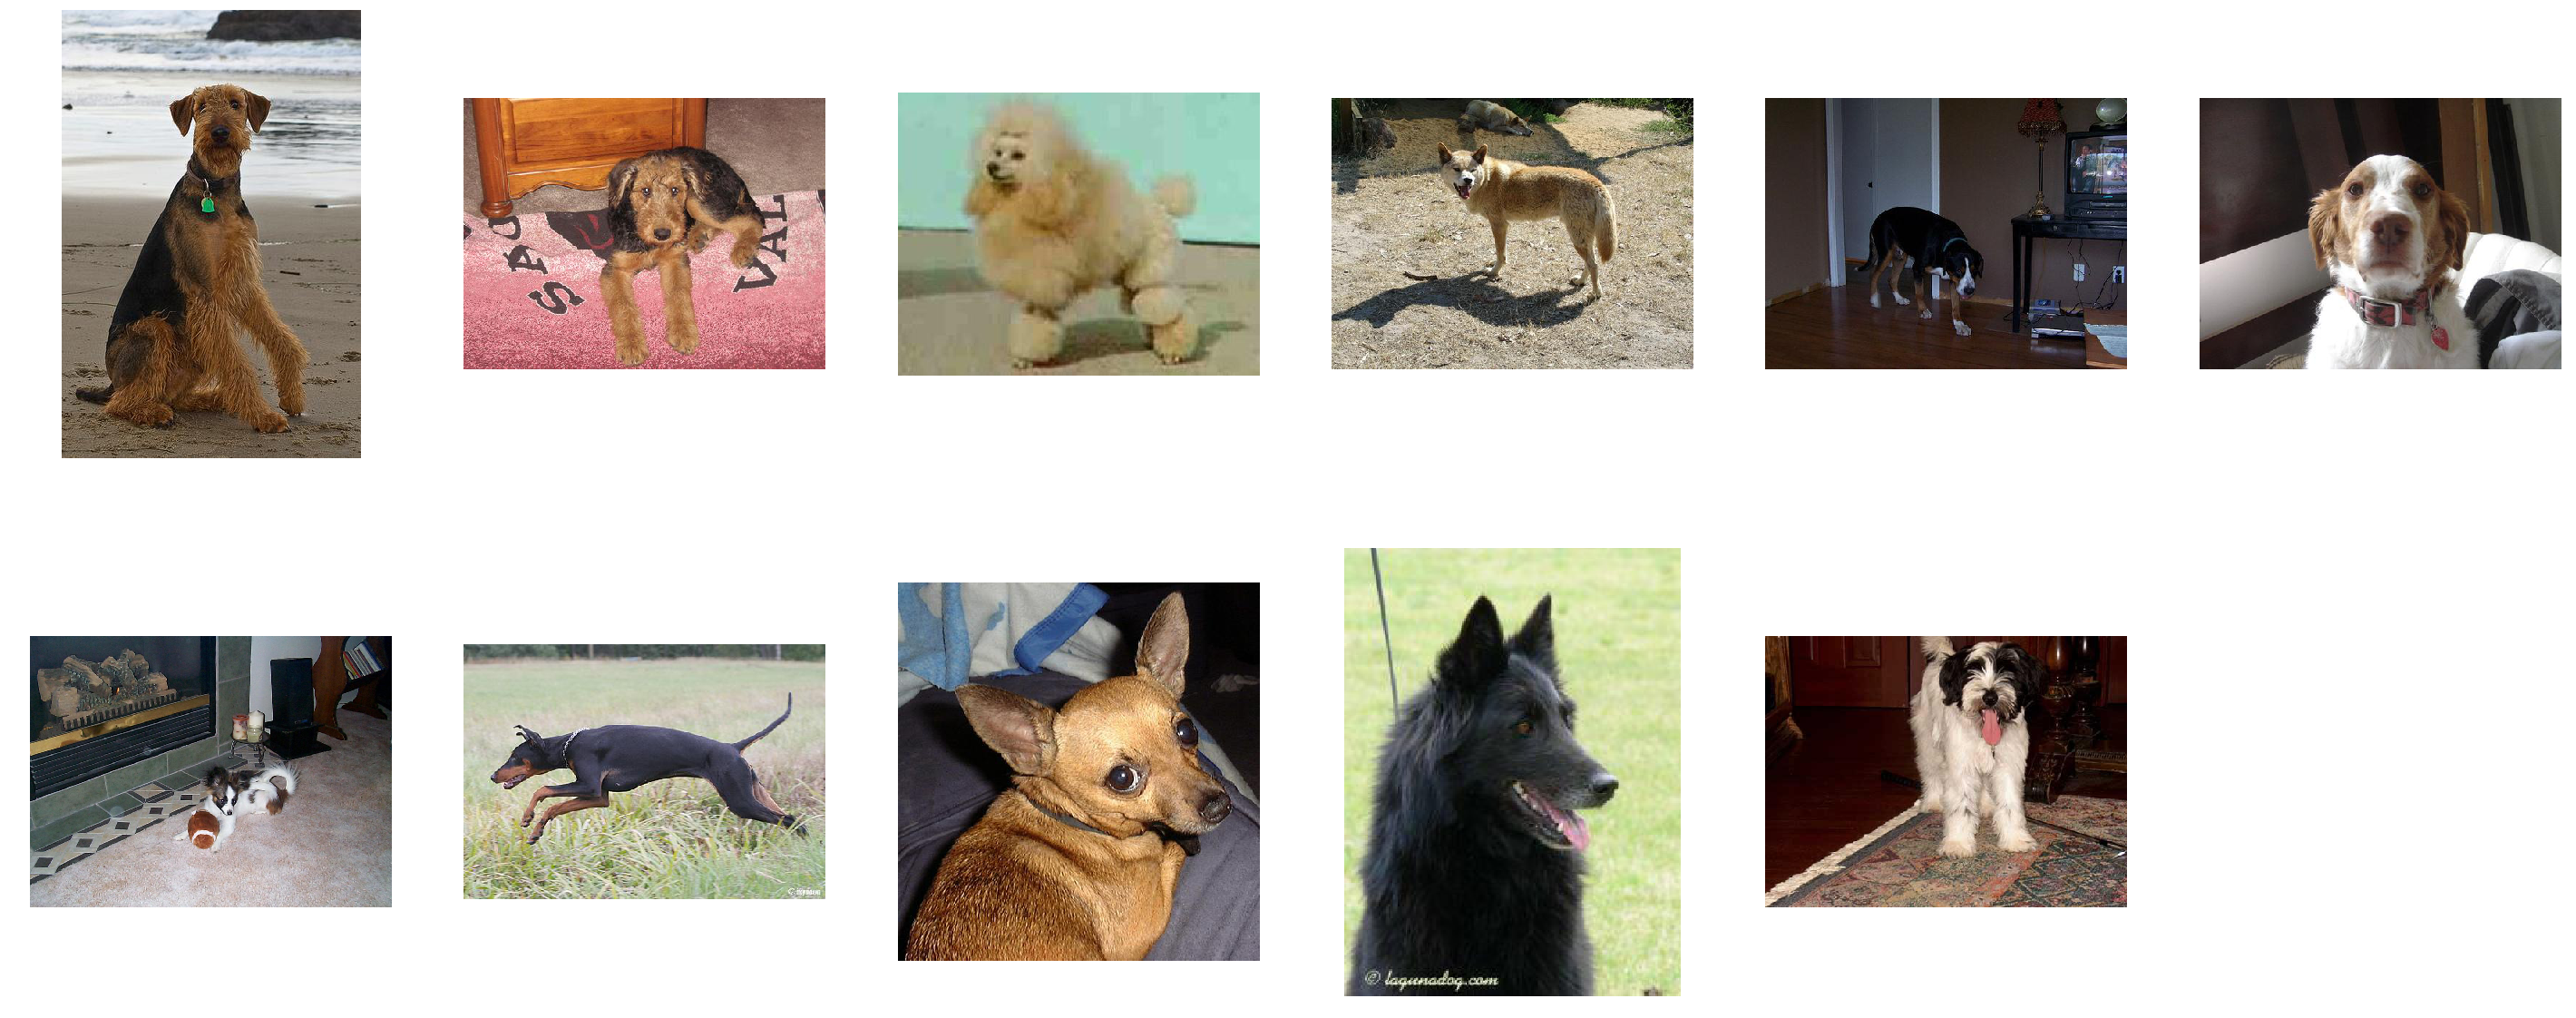

In [6]:
plt.figure(figsize=(50,20))
for ix, img_path in enumerate(images_path_list[:1701:170]):
    plt.subplot(2, 6, ix+1)
    plt.axis("off")
    plt.imshow(Image.open(img_path))
plt.show()

## Checking for integrity

It's necessary to know if our data is right or not. The cell bellow does that. TODO, MORE TEXT.

In [ ]:
# How to check integrity of Image with PIL: https://stackoverflow.com/a/53470950
for image_path in images_path_list:
    try:
        img = Image.open(image_path)
        img.verify() # checks for defects
        img.close() # flushs memory
        img = Image.open(image_path) 
        img.transpose(Image.FLIP_LEFT_RIGHT) # make a operation to be sure everything is ok
        img.close()
    except Exception as e: 
        print(f"File: {image_path}, has encountered error: {e}")

If the cell above ran without any output then everything is ok! 

## Making a DataFrame for the Dataset

In [ ]:
class_names = [re.findall("\/.*\d(-.*)", item)[0] for item in classes_dir]
print(class_names[:10])

In [ ]:
df = pd.DataFrame(images_path_list, columns=['path'])
df["breed"] = [breed for path in df.path for breed in class_names if breed in path]
df.breed = df.breed.str.replace('-', '').str.lower()

In [ ]:
df.head()

## Separating test, train, validation datasets

In [ ]:
train_df, test_df = train_test_split(df, 
                               test_size=0.3,
                               random_state=42,
                               shuffle=True,
                               stratify=df.breed)

In [ ]:
test_df, val_df = train_test_split(test_df,
                                   test_size=0.15,
                                   random_state=42,
                                   shuffle=True)

In [ ]:
print(f'Size of train data: {len(train_df)} \nSize of test data: {len(test_df)} \nSize of validation data: {len(val_df)}')

## Saving Dataset as csv

In [ ]:
train_df.to_csv('./data/csv/train.csv')
test_df.to_csv('./data/csv/test.csv')
val_df.to_csv('./data/csv/val.csv')